In [1]:
import numpy as mp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from datetime import timedelta
import covsirphy as cs
from matplotlib.ticker import ScalarFormatter

c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
scenario = cs.ODEScenario.auto_build(geo='Japan', model=cs.SIRFModel)

c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\covsirphy\gis\_layer.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  loc_df = pd.concat([self._loc_df, loc_df], axis=0, ignore_index=True)
c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\covsirphy\downloading\_db_covid19dh.py:71: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Grand Princess' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df[self.COUNTRY] == ship, [self.ISO3, self.PROVINCE]] = [self.OTHERS, ship]
c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\covsirphy\gis\_layer.py:124: Future

### Таблиця з параметрами

In [3]:
scenario.summary()

Start        End    Rt     theta     kappa       rho  \
Scenario Phase                                                             
Baseline 0th   2020-02-23 2020-08-10  1.28  0.079609  0.000109  0.001822   
         1st   2020-08-11 2020-11-16  0.87  0.002197   0.00001  0.000682   
         2nd   2020-11-17 2020-12-24  1.36  0.003492  0.000017  0.001112   
         3rd   2020-12-25 2021-01-16  1.56  0.001804  0.000015  0.001239   
         4th   2021-01-17 2021-02-10  0.68  0.000204  0.000025  0.000783   
...                   ...        ...   ...       ...       ...       ...   
         63rd  2023-03-12 2023-03-27  1.68  0.002423  0.000003   0.00104   
         64th  2023-03-28 2023-04-07  0.68  0.000775  0.000005  0.001153   
         65th  2023-04-08 2023-04-18  1.44  0.001387  0.000003  0.001525   
         66th  2023-04-19 2023-04-27  1.93  0.002633  0.000001  0.001457   
         67th  2023-04-28 2023-05-08  1.59  0.004887  0.000002  0.001379   

                   sigma  alpha1 [-]  1/alpha2 [day]  1/beta [day]  \
Scenario Phase                                                       
Baseline 0th    0.001199        0.08             153             9   
         1st    0.000772       0.002            1728            24   
         2nd      0.0008       0.003             998            15   
         3rd    0.000778       0.002            1143            13   
         4th    0.001126         0.0             661            21   
...                  ...         ...             ...           ...   
         63rd   0.000613       0.002            5753            16   
         64th   0.001688       0.001            3390            14   
         65th   0.001053       0.001            5540            11   
         66th   0.000751       0.003           11865            11   
         67th    0.00086       0.005            9747            12   

                1/gamma [day]          ODE  tau  
Scenario Phase                                   
Baseline 0th               14  SIR-F Model   24  
         1st               22  SIR-F Model   24  
         2nd               21  SIR-F Model   24  
         3rd               21  SIR-F Model   24  
         4th               15  SIR-F Model   24  
...                       ...          ...  ...  
         63rd              27  SIR-F Model   24  
         64th              10  SIR-F Model   24  
         65th              16  SIR-F Model   24  
         66th              22  SIR-F Model   24  
         67th              19  SIR-F Model   24  

[68 rows x 13 columns]

### Графік залежності від кількості хворих.

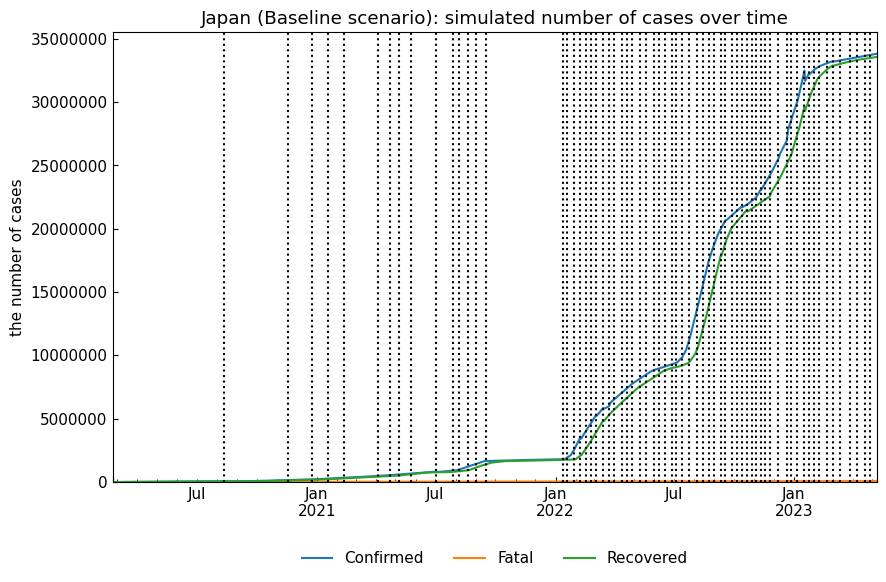

,Confirmed,Fatal,Recovered
Date,,,
2020-02-23,128.0,1.0,25.0
2020-02-24,139.0,3.0,32.0
2020-02-25,151.0,4.0,40.0
2020-02-26,163.0,6.0,48.0
2020-02-27,174.0,7.0,56.0
...,...,...,...
2023-05-04,33785319.0,74910.0,33538354.0
2023-05-05,33795801.0,74979.0,33547266.0
2023-05-06,33806374.0,75049.0,33556256.0


In [4]:
scenario.simulate(name="Baseline")

In [5]:
scenario.track()

,Scenario,Phase,Rt,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],ODE,tau
Date,,,,,,,,,,,,,
2020-02-23,Baseline,0th,1.28,0.079609,0.000109,0.001822,0.001199,0.08,153,9,14,SIR-F Model,24
2020-02-24,Baseline,0th,1.28,0.079609,0.000109,0.001822,0.001199,0.08,153,9,14,SIR-F Model,24
2020-02-25,Baseline,0th,1.28,0.079609,0.000109,0.001822,0.001199,0.08,153,9,14,SIR-F Model,24
2020-02-26,Baseline,0th,1.28,0.079609,0.000109,0.001822,0.001199,0.08,153,9,14,SIR-F Model,24
2020-02-27,Baseline,0th,1.28,0.079609,0.000109,0.001822,0.001199,0.08,153,9,14,SIR-F Model,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-04,Baseline,67th,1.59,0.004887,0.000002,0.001379,0.00086,0.005,9747,12,19,SIR-F Model,24
2023-05-05,Baseline,67th,1.59,0.004887,0.000002,0.001379,0.00086,0.005,9747,12,19,SIR-F Model,24
2023-05-06,Baseline,67th,1.59,0.004887,0.000002,0.001379,0.00086,0.005,9747,12,19,SIR-F Model,24


### Графік зміни параметрів з часом

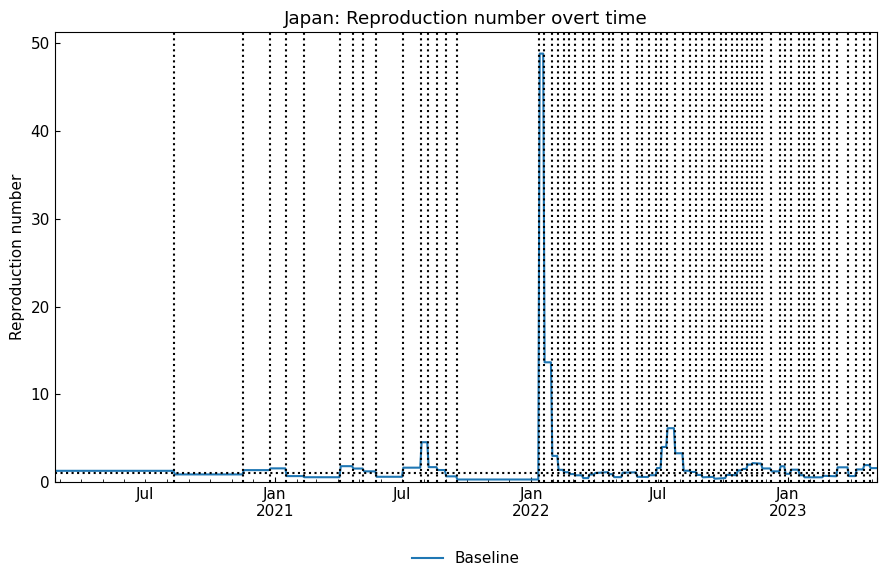

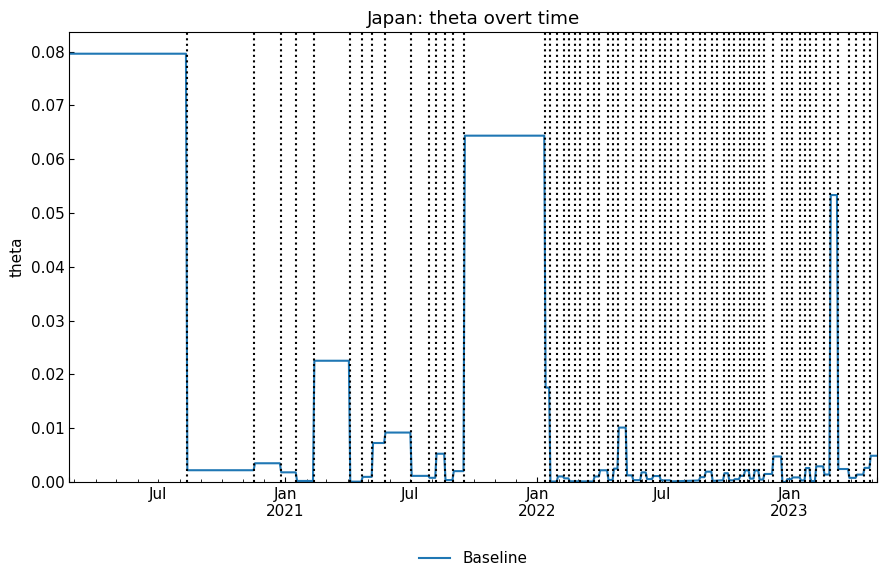

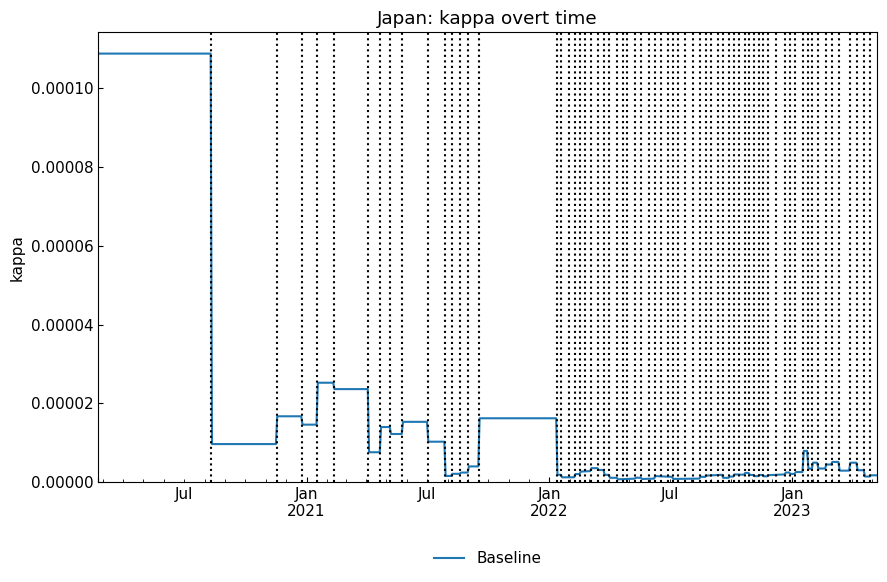

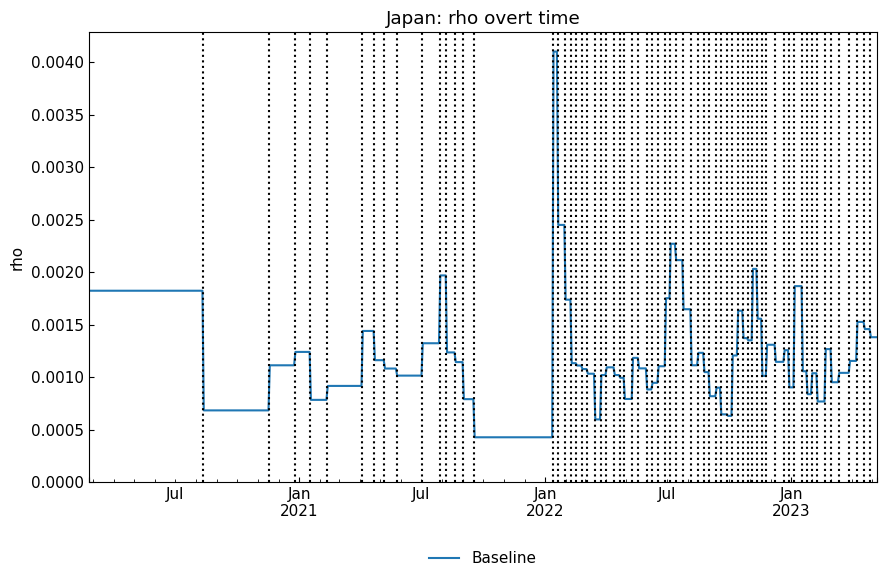

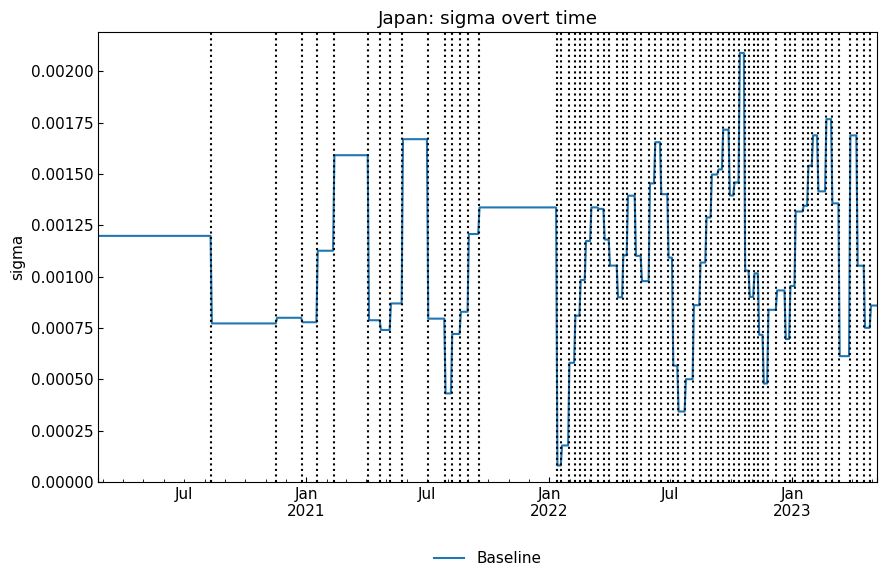

Scenario,Baseline
Date,
2020-02-23,0.001199
2020-02-24,0.001199
2020-02-25,0.001199
2020-02-26,0.001199
2020-02-27,0.001199
...,...
2023-05-04,0.00086
2023-05-05,0.00086
2023-05-06,0.00086


In [6]:
scenario.compare_param("Rt")
scenario.compare_param("theta")
scenario.compare_param("kappa")
scenario.compare_param("rho")
scenario.compare_param("sigma")

In [8]:
future_start_date = scenario.simulate(display=False).index.max() + timedelta(days=1)

scenario.build_with_template(name="Predicted", template="Baseline")
scenario.predict(days=7, name="Predicted")

Using 3 cpus for n_jobs.
Model Number: 1 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 2 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
Model Number: 3 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "SeasonalDifference", "1": "Round", "2": "Detrend"}, "transformation_params": {"0": {"lag_1": 7, "method": "Mean"}, "1": {"model": "middle", "decimals":

c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:3211: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


Model Number: 13 with model ConstantNaive in generation 0 of 1 with params {} and transformations {"fillna": "ffill", "transformations": {"0": "PowerTransformer", "1": "QuantileTransformer", "2": "SeasonalDifference"}, "transformation_params": {"0": {}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {"lag_1": 7, "method": "LastValue"}}}
Model Number: 14 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 364, "lag_2": 28} and transformations {"fillna": "ffill", "transformations": {"0": "SeasonalDifference", "1": "MaxAbsScaler", "2": "Round"}, "transformation_params": {"0": {"lag_1": 7, "method": "LastValue"}, "1": {}, "2": {"decimals": 0, "on_transform": false, "on_inverse": true}}}
Model Number: 15 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 364, "lag_2": 30} and transformations {"fillna": "fake_date", "transformations": {"0": "SeasonalDifference", "1": "MaxAbsScaler", "2": "Round

c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


### Прогноз показників на 7 днів

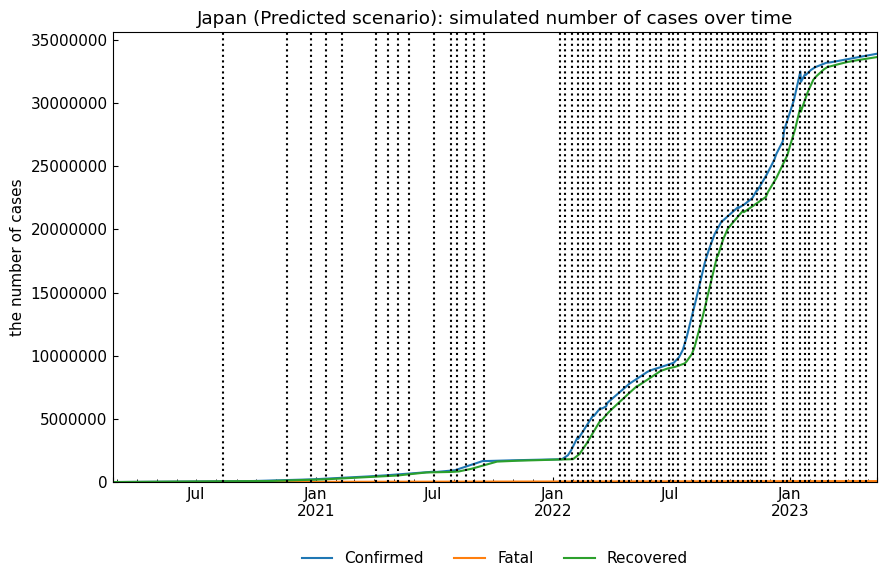

,Confirmed,Fatal,Recovered
Date,,,
2020-02-23,128.0,1.0,25.0
2020-02-24,139.0,3.0,32.0
2020-02-25,151.0,4.0,40.0
2020-02-26,163.0,6.0,48.0
2020-02-27,174.0,7.0,56.0
...,...,...,...
2023-05-11,33860614.0,75406.0,33602393.0
2023-05-12,33871742.0,75479.0,33611862.0
2023-05-13,33882965.0,75553.0,33621413.0


In [9]:
scenario.simulate(name="Predicted")

In [10]:
scenario.build_with_template(name="Predicted", template="Baseline")
scenario.predict(days=30, name="Predicted")

Using 3 cpus for n_jobs.
Model Number: 1 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 2 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
Model Number: 3 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "SeasonalDifference", "1": "Round", "2": "Detrend"}, "transformation_params": {"0": {"lag_1": 7, "method": "Mean"}, "1": {"model": "middle", "decimals":

c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:3211: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


Model Number: 13 with model ConstantNaive in generation 0 of 1 with params {} and transformations {"fillna": "ffill", "transformations": {"0": "PowerTransformer", "1": "QuantileTransformer", "2": "SeasonalDifference"}, "transformation_params": {"0": {}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {"lag_1": 7, "method": "LastValue"}}}
Model Number: 14 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 364, "lag_2": 28} and transformations {"fillna": "ffill", "transformations": {"0": "SeasonalDifference", "1": "MaxAbsScaler", "2": "Round"}, "transformation_params": {"0": {"lag_1": 7, "method": "LastValue"}, "1": {}, "2": {"decimals": 0, "on_transform": false, "on_inverse": true}}}
Model Number: 15 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 364, "lag_2": 30} and transformations {"fillna": "fake_date", "transformations": {"0": "SeasonalDifference", "1": "MaxAbsScaler", "2": "Round

c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: inval

Model Number: 62 with model AverageValueNaive in generation 1 of 1 with params {"method": "Weighted_Mean", "window": null} and transformations {"fillna": "ffill", "transformations": {"0": "KalmanSmoothing", "1": "AlignLastValue"}, "transformation_params": {"0": {"model_name": "local linear hidden state with seasonal 12", "state_transition": [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1

In [11]:
df = scenario.append().summary()
df.loc[df["Start"] >= future_start_date]

Start        End    Rt     theta     kappa       rho  \
Scenario  Phase                                                             
Predicted 68th  2023-05-09 2023-05-19  1.59  0.003492  0.000003  0.001379   
          69th  2023-05-20 2023-05-29   1.6  0.002919  0.000003  0.001379   
          70th  2023-05-30 2023-06-07  1.59  0.005246  0.000003  0.001379   

                   sigma  alpha1 [-]  1/alpha2 [day]  1/beta [day]  \
Scenario  Phase                                                      
Predicted 68th   0.00086       0.003            6280            12   
          69th   0.00086       0.003            6252            12   
          70th   0.00086       0.005            6227            12   

                 1/gamma [day]          ODE  tau  
Scenario  Phase                                   
Predicted 68th              19  SIR-F Model   24  
          69th              19  SIR-F Model   24  
          70th              19  SIR-F Model   24

### Прогноз показників на 30 днів

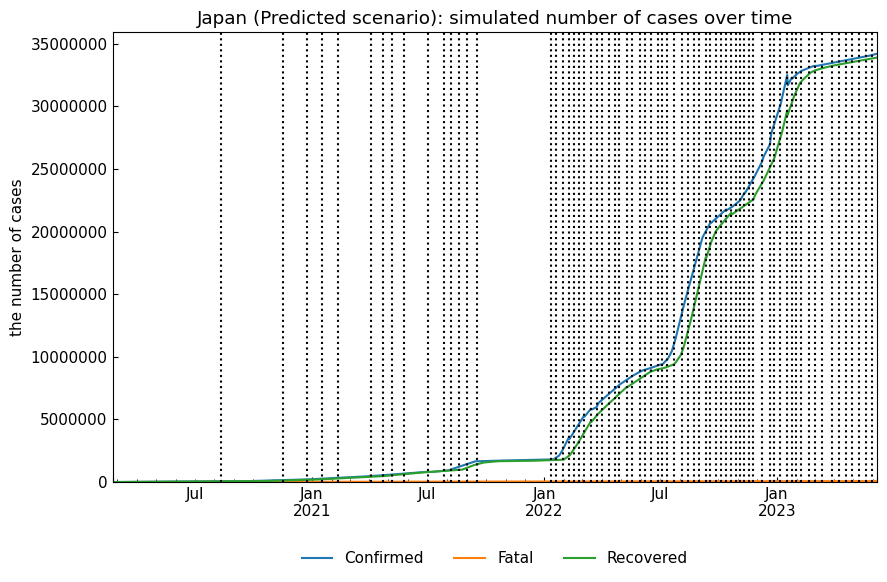

,Confirmed,Fatal,Recovered
Date,,,
2020-02-23,128.0,1.0,25.0
2020-02-24,139.0,3.0,32.0
2020-02-25,151.0,4.0,40.0
2020-02-26,163.0,6.0,48.0
2020-02-27,174.0,7.0,56.0
...,...,...,...
2023-06-03,34142076.0,77142.0,33842243.0
2023-06-04,34155589.0,77249.0,33853776.0
2023-06-05,34169213.0,77357.0,33865406.0


In [12]:
scenario.simulate(name="Predicted")

In [13]:
scenario.build_with_template(name="Predicted", template="Baseline")
scenario.predict(days=300, name="Predicted")

Using 3 cpus for n_jobs.
Model Number: 1 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 2 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
Model Number: 3 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "SeasonalDifference", "1": "Round", "2": "Detrend"}, "transformation_params": {"0": {"lag_1": 7, "method": "Mean"}, "1": {"model": "middle", "decimals":

c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:3211: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


Model Number: 12 with model SeasonalNaive in generation 0 of 1 with params {"method": "LastValue", "lag_1": 7, "lag_2": 2} and transformations {"fillna": "mean", "transformations": {"0": "QuantileTransformer", "1": "ClipOutliers"}, "transformation_params": {"0": {"output_distribution": "uniform", "n_quantiles": 1000}, "1": {"method": "clip", "std_threshold": 2, "fillna": null}}}
Model Number: 13 with model ConstantNaive in generation 0 of 1 with params {} and transformations {"fillna": "ffill", "transformations": {"0": "PowerTransformer", "1": "QuantileTransformer", "2": "SeasonalDifference"}, "transformation_params": {"0": {}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {"lag_1": 7, "method": "LastValue"}}}
Model Number: 14 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 364, "lag_2": 28} and transformations {"fillna": "ffill", "transformations": {"0": "SeasonalDifference", "1": "MaxAbsScaler", "2": "Round"}, "transform

In [14]:
df = scenario.append().summary()
df.loc[df["Start"] >= future_start_date]

Start        End    Rt     theta     kappa       rho  \
Scenario  Phase                                                             
Predicted 68th  2023-06-08 2023-10-26  1.21  0.004887  0.000002  0.001379   
          69th  2023-10-27 2024-04-02   1.2  0.004887  0.000002  0.001379   

                    sigma  alpha1 [-]  1/alpha2 [day]  1/beta [day]  \
Scenario  Phase                                                       
Predicted 68th   0.001137       0.005            7532            12   
          69th   0.001146       0.005            7034            12   

                 1/gamma [day]          ODE  tau  
Scenario  Phase                                   
Predicted 68th              15  SIR-F Model   24  
          69th              15  SIR-F Model   24

### Прогноз показників на 300 днів

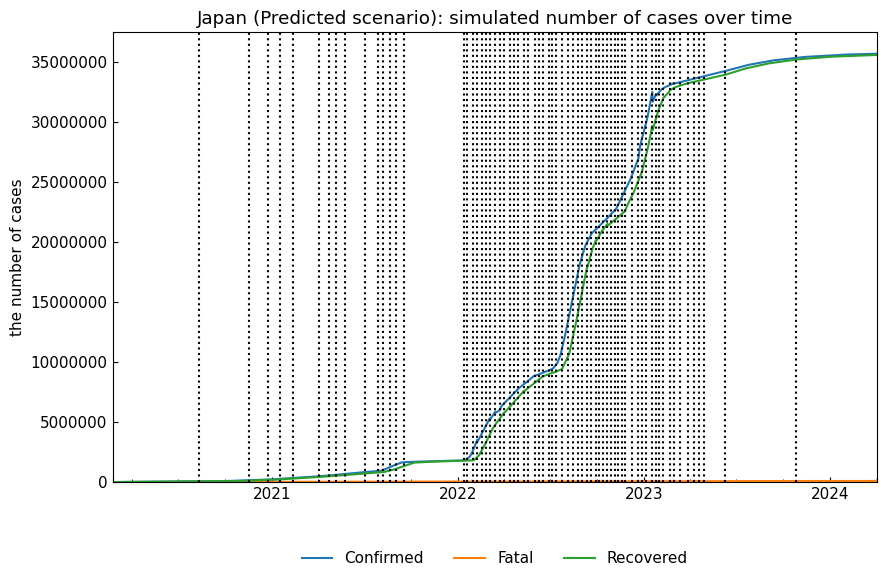

,Confirmed,Fatal,Recovered
Date,,,
2020-02-23,128.0,1.0,25.0
2020-02-24,139.0,3.0,32.0
2020-02-25,151.0,4.0,40.0
2020-02-26,163.0,6.0,48.0
2020-02-27,174.0,7.0,56.0
...,...,...,...
2024-03-29,35675920.0,88171.0,35572430.0
2024-03-30,35676826.0,88178.0,35573478.0
2024-03-31,35677722.0,88184.0,35574516.0


In [15]:
scenario.simulate(name="Predicted")